## Introduction

The online retailer Ice sells video games worldwide. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available in open sources. The aim is to identify patterns that determine whether a game is successful or not. This will allow for the identification of potential big winners and for planning advertising campaigns.

Analysis from December 2016 and for planning campaigns for 2017.

The dataset contains the abbreviation ESRB. The Entertainment Software Rating Board evaluates the content of a game and assigns an age rating, such as Teen or Mature.

## Objective

To analyze game evaluation data to identify which has the greatest potential for planning advertising campaigns in 2017.

## Initialization

Importing libraries for use during data analysis.

In [1]:
# Loading all libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
import math as mt
from scipy import stats as st

## Loading data

Loading file data about game ratings and sales.

In [2]:
# Loading plan data file
df_games = pd.read_csv('games.csv')

## Preparing the data for analysis
The data for this project is in the file 'games.csv'.

Analysis of the information will be performed to gain an initial understanding of the data and make any necessary corrections.

### Data Description

Here is a description of the columns in the file.
- `Name` - name of the game
- `Platform` - platform / video game
- `Year_of_Release` - Year of release
- `Genre` - game genre
- `NA_sales` - North American sales in millions of USD
- `EU_sales` - sales in Europe in millions of USD
- `JP_sales` - sales in Japan in millions of USD
- `Other_sales` - sales in other countries in millions of USD
- `Critic_Score` - Expert Score: maximum of 100
- `User_Score` - User Score: maximum of 10
- `Rating` - Rating (ESRB) / Age rating as teen or mature

This data may be incomplete.

In [3]:
# Printing general DataFrame information.
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
# Printing a sample of the data
display(df_games.head(20))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [5]:
# Printing an analysis of the variables
display(df_games.describe())

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


The file has 16,715 lines of information with 11 columns.

We have capital letters in the column names. These will be converted to lowercase letters only to facilitate analysis.

We have missing values ​​in the columns `name`, `year_of_release`, `genre`, `critic_score`, `user_score` and `rating`. These occurrences should be investigated to determine actions to resolve and clarify data.

Some columns are classified with a type that is inconsistent with what is observed and will undergo conversions to adapt.

The numerical analysis of the `user_score` column was not performed because the data is of the 'object' type. When we organize the information, another check will be performed.

### Adjusting column names

For agility and to facilitate data analysis, column names will be converted to lowercase letters only.

In [6]:
# Converting column names to lowercase letters only
df_games.columns = df_games.columns.str.lower()

# Checking
display(df_games.head(2))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN


### Analyzing and investigating missing values

The observed missing values ​​may have occurred due to a number of factors, such as:
- system error during data collection
- system error during data extraction
- people did not want to perform a critical assessment

In [7]:
# Checking number of missing values ​​per column
print(df_games.isna().sum())

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


Studying missing values ​​from the `name` column.

In [8]:
# Checking the 2 rows of the column with missing values
display(df_games.loc[df_games['name'].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Since this is only 2 rows out of a total of 16,715, these will be deleted from the file. Since this is a very small volume, it will not impact the final results.

Since it coincides with the 2 missing values ​​present in the `genre` column, this problem will also be resolved.

In [9]:
# Deleting rows with missing values ​​in 'name' and 'genre' columns
df_games = df_games.dropna(subset=['name'])

# Resetting the index
df_games = df_games.reset_index(drop=True)

# Checking
df_games.info()
print()
display(df_games.loc[df_games['name'].isna()])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB



,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Studying missing values ​​from `year_of_release` column.

In [10]:
# Checking for rows in column 'year_of_release' with missing values
display(df_games.loc[df_games['year_of_release'].isna()])

# Extracting the year from the end of the 'name' field
df_games['year_replacement'] = df_games['name'].str.extract(r'(\d{4})$', expand=False)

# Adapting the 'Dtype' data type
df_games['year_replacement'] = pd.to_numeric(df_games['year_replacement'], errors='coerce')

# Correcting release year value (game - 1)
df_games['year_replacement'] = df_games['year_replacement'] - 1

# Filling in missing values ​​in 'year_of_release'
df_games['year_of_release'] = df_games['year_of_release'].fillna(df_games['year_replacement'])

# Excluindo a coluna auxilar 'year_replacement'
df_games = df_games.drop('year_replacement', axis=1)

# Checking
display(df_games.loc[df_games['year_of_release'].isna()])
print()
df_games.info()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16371,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16403,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16446,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16456,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
677,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
...,...,...,...,...,...,...,...,...,...,...,...
16346,Agarest Senki: Re-appearance,PS3,NaN,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16403,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16446,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16456,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16459 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In this first step, it was not yet possible to fill in all the missing values ​​in the `year_of_release` column. We worked within the dataset with years present in the names of the games in order to achieve more accurate results.

Then, the missing values, still present, will be treated with the median of the years in which the titles were released on other platforms.

In [11]:
# Replacing missing values ​​with the median value of the same game on other platforms
df_games['year_of_release'] = df_games.groupby('name')['year_of_release'].transform(lambda x: x.fillna(x.median()))

# Checking
display(df_games.loc[df_games['year_of_release'].isna()])
print()
df_games.info()

/Users/thiagodelreyramosdemelo/.pyenv/versions/3.10.13/lib/python3.10/site-packages/numpy/lib/_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/thiagodelreyramosdemelo/.pyenv/versions/3.10.13/lib/python3.10/site-packages/numpy/lib/_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/thiagodelreyramosdemelo/.pyenv/versions/3.10.13/lib/python3.10/site-packages/numpy/lib/_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/thiagodelreyramosdemelo/.pyenv/versions/3.10.13/lib/python3.10/site-packages/numpy/lib/_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/thiagodelreyramosdemelo/.pyenv/versions/3.10.13/lib/python3.10/site-packages/numpy/lib/_nanfunctions_impl.py:1241: RuntimeWarning: Me

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
804,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T
1141,Rock Band,PS3,NaN,Misc,0.99,0.41,0.00,0.22,92.0,8.4,T
1300,Triple Play 99,PS,NaN,Sports,0.81,0.55,0.00,0.10,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16275,Homeworld Remastered Collection,PC,NaN,Strategy,0.00,0.01,0.00,0.00,86.0,8.2,E10+
16286,Shorts,DS,NaN,Platform,0.01,0.00,0.00,0.00,NaN,tbd,E10+
16346,Agarest Senki: Re-appearance,PS3,NaN,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16456,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16574 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Since we still have missing values ​​in the `year_of_release` column, these missing values ​​will be replaced by the median year of the games on the platform. Since if we still have this missing data it is because the games do not exist on other platforms.

In [12]:
# Replacing missing values ​​with the median for each platform
df_games['year_of_release'] = df_games.groupby('platform')['year_of_release'].transform(lambda x: x.fillna(x.median()))

# Checking
display(df_games.loc[df_games['year_of_release'].isna()])
print()
df_games.info()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Studying missing values ​​from `critic_score` column.

In [13]:
# Checking rows of column 'critic_score' with missing values
display(df_games.loc[df_games['critic_score'].isna()])

# Replacing missing values ​​with the median of each gender
df_games['critic_score'] = df_games.groupby('genre')['critic_score'].transform(lambda x: x.fillna(x.median()))


# Checking
display(df_games.loc[df_games['critic_score'].isna()])
print()
df_games.info()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16709,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16710,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


After investigation, the missing values ​​in the `critic_score` column were replaced by the average for each gender. However, for some reason, not all rows were filled and remained empty.

Studying and working on the 'tbd' values ​​of the `user_score` column.

In [14]:
# Working with the 'tbd' value in the 'user_score' column
print(df_games['user_score'].value_counts())

# Replacing 'tbd' values ​​with missing values
df_games['user_score'] = df_games['user_score'].replace('tbd', np.nan)

# Converting data type to float
df_games['user_score'] = df_games['user_score'].astype(float)

# Checking
display(df_games.loc[df_games['user_score']=='tbd'])
print()
display(df_games.loc[df_games['user_score'].isna()])
print()
df_games.info()



user_score
tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: count, Length: 96, dtype: int64


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,69.0,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,74.0,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,70.0,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,73.0,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,70.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,68.0,NaN,NaN
16709,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,75.0,NaN,NaN
16710,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,66.0,NaN,NaN
16711,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,69.0,NaN,NaN



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


After studying the 'tbd' values ​​in the `user_score` column, these were changed to include missing values ​​so that all of them could be replaced by the median of the 'user_score' for the respective genders. The data type was converted from 'object' to 'float' since they are numeric data.

In [15]:
# Checking for rows in column 'user_score' with missing values
display(df_games.loc[df_games['user_score'].isna()])

# Replacing missing values ​​with the median of each gender
df_games['user_score'] = df_games.groupby(
    'genre')['user_score'].transform(lambda x: x.fillna(x.median()))

# Checking
display(df_games.loc[df_games['user_score'].isna()])
print()
df_games.info()


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,69.0,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,74.0,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,70.0,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,73.0,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,70.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,68.0,NaN,NaN
16709,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,75.0,NaN,NaN
16710,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,66.0,NaN,NaN
16711,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,69.0,NaN,NaN


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


Studying the values ​​of the `rating` column.

In [16]:
print(df_games['rating'].unique())
print()
print(df_games['rating'].value_counts())

# Replacing missing values ​​with unknown
df_games['rating'] = df_games['rating'].fillna('unknown')

# Verificando
display(df_games.loc[df_games['rating'].isna()])
print()
df_games.info()


['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']

rating
E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: count, dtype: int64


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


### Converting data types

Some columns will have their data types converted to improve clarity and make the information cleaner.

The following columns will undergo data type conversion:
- `year_of_release`: from float to integer, to make the data cleaner.
- `critic_score`: from float to integer, to make the data cleaner.

It is worth remembering that the `user_score` column has already undergone this data type conversion, from 'object' to 'float', so that it would be possible to perform the processing of missing values ​​and the 'tbd' information that it contained.

In [17]:
# Converting column data types
df_games['year_of_release'] = df_games['year_of_release'].astype(int)
df_games['critic_score'] = df_games['critic_score'].astype(int)

# Verification
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  int64  
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


### Creating a new column

For necessary evaluations, the `total_sales` column will be created, which will be the sum of the sales of the columns `na_sales`, `eu_sales`, `jp_sales` and `other_sales`.

In [18]:
# Creating a new column with the total sales
df_games['total_sales'] = df_games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

# Checking
display(df_games.head(5))
print()
df_games.info()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,69,7.7,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,74,7.8,unknown,31.38



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  int64  
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
 11  total_sales      16713 non-null  float64
dtypes: float64(6), int64(2), object(4)
memory usage: 1.5+ MB


## Data analysis

### Sales evolution
To begin the data analysis, the evolution of game releases over the years will be verified.

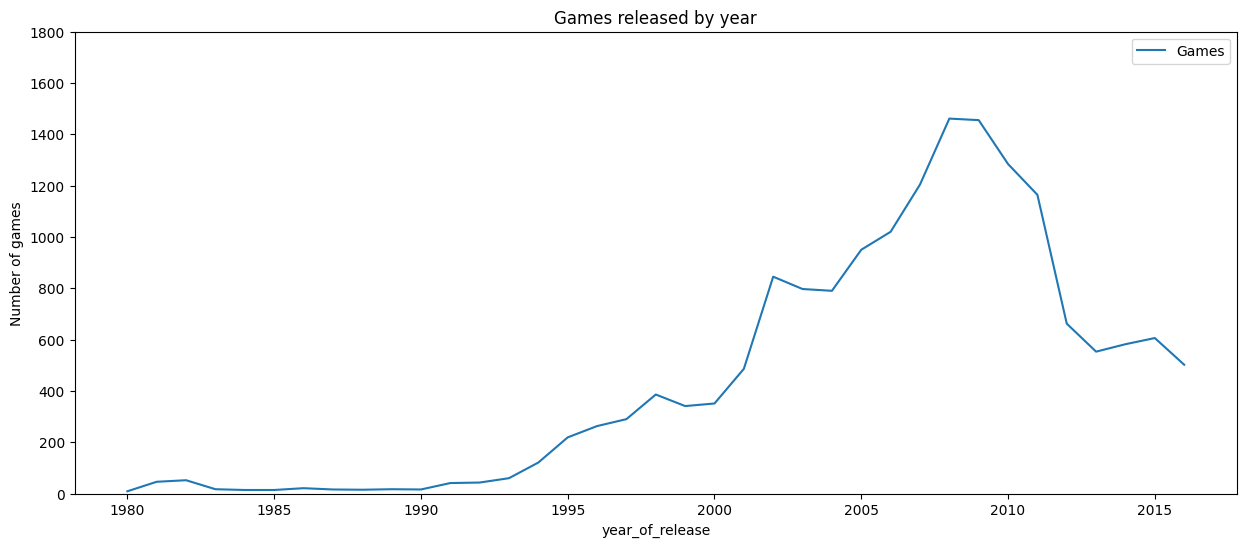

In [19]:
# Creating a dynamic table of games released by year
df_games_years = df_games.pivot_table(index='year_of_release', values='name', aggfunc='count')

# Creating line chart
df_games_years.plot(figsize=(15, 6))
plt.title('Games released by year')
plt.ylabel('Number of games')
plt.ylim(0, 1800)
plt.legend(['Games', 'name'])
plt.show()


In the 1980s, very few games were released each year, and a similar volume continued until the mid-1990s, when a slight increase in the number of new games per year was observed. Game releases began to grow sharply around 1993 and reached their peak of 1,476 releases in 2009. From then on, a decrease in new releases was observed over the years, reaching only 502 new games in 2016.

The variation in sales between platforms per year will be seen below.

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,N64,NES,NG,PC,PCFX,PS,PS2,PS3,PS4,PSP,PSV,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1980,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981,46.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,11.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988,2.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,11.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


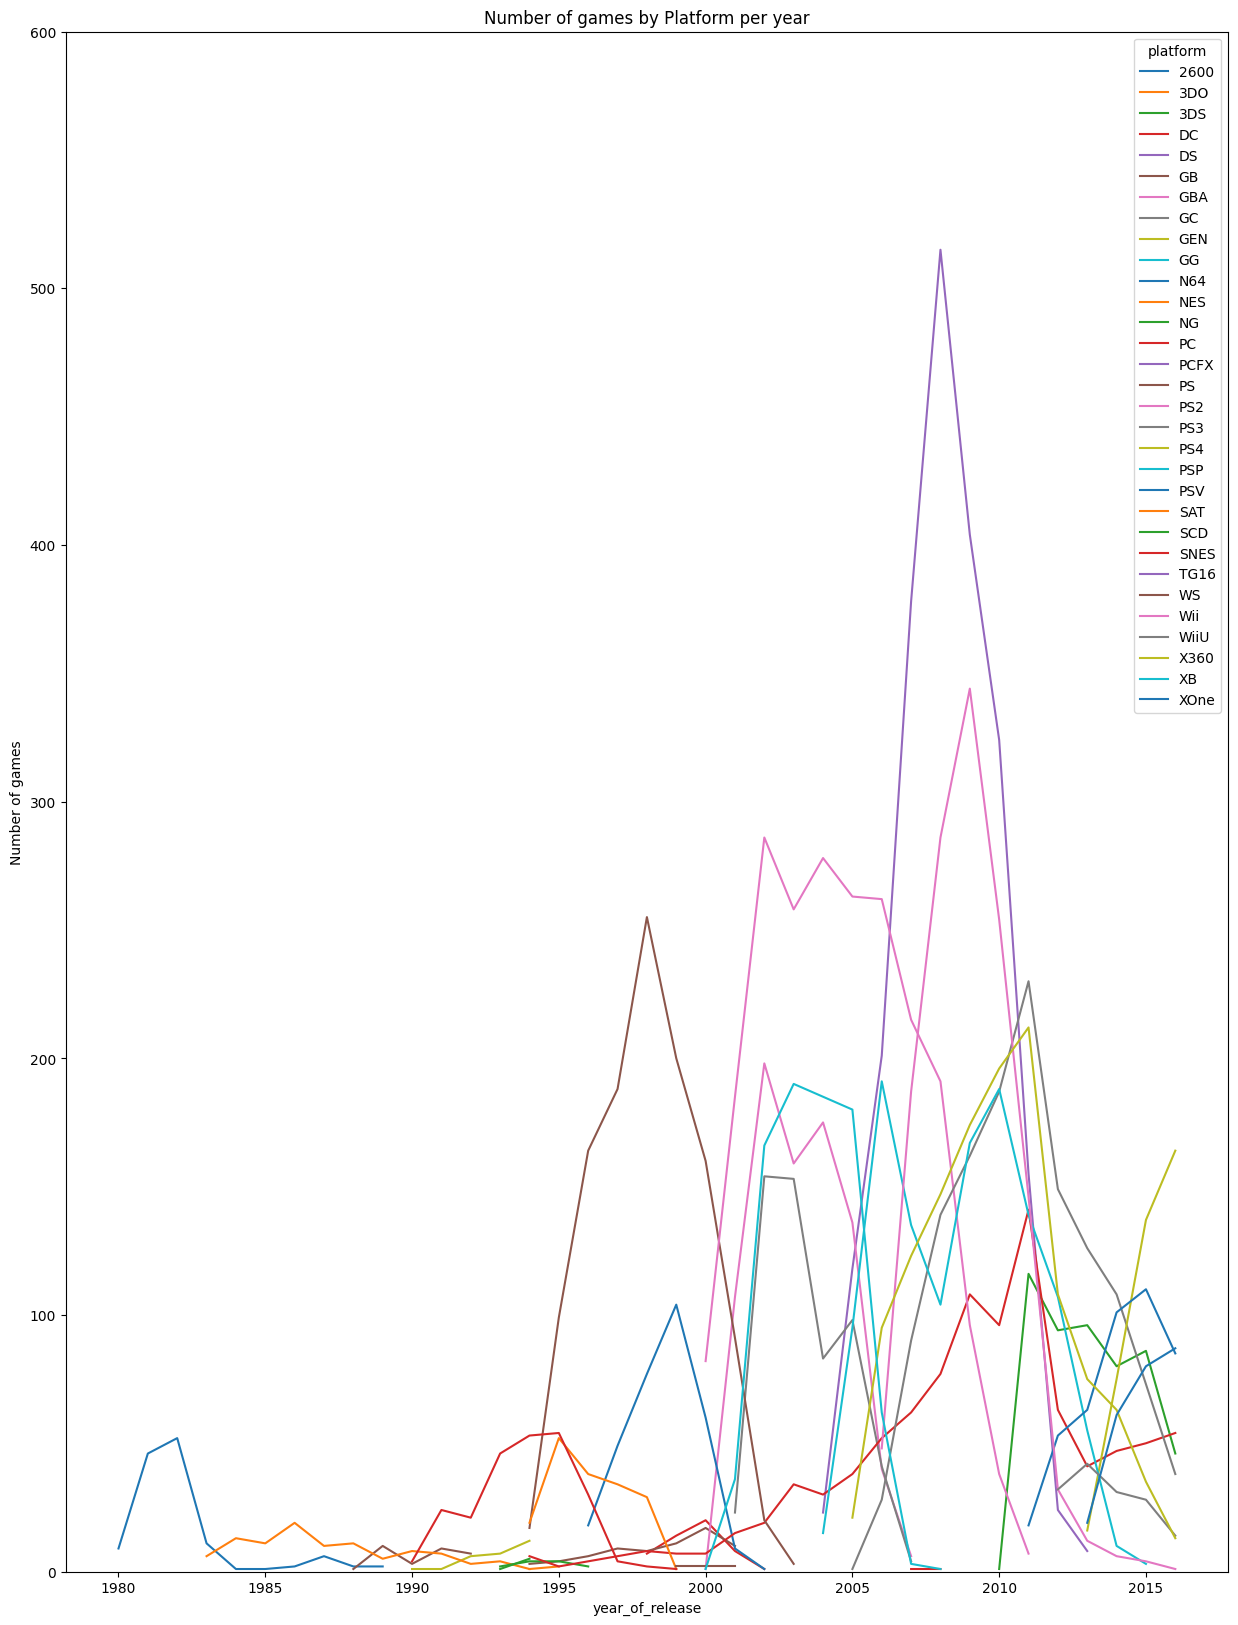

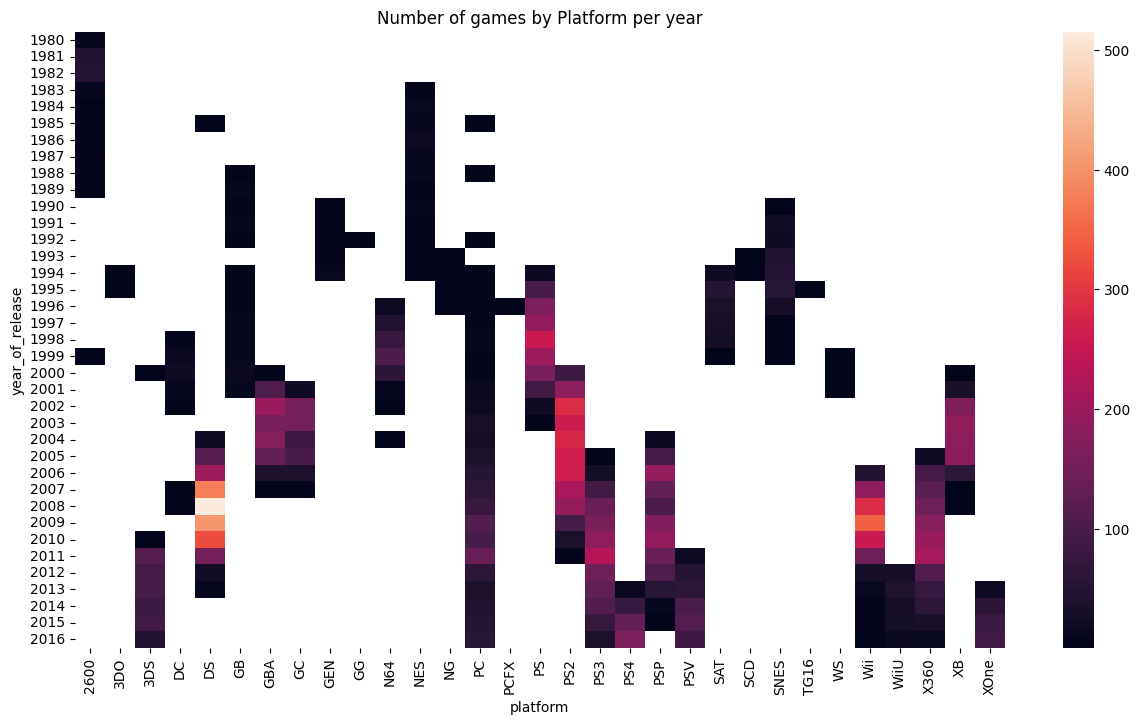

In [20]:
# Creating a dynamic table of games released by platform by year
df_games_plat_years = df_games.pivot_table(index='year_of_release', columns='platform', values='name', aggfunc='count')

# Configuring pandas to show all columns
pd.set_option('display.max_columns', None)

display(df_games_plat_years)

# Creating line chart
df_games_plat_years.plot(figsize=(15, 20))
plt.title('Number of games by Platform per year')
plt.ylabel('Number of games')
plt.ylim(0, 600)
plt.show()


# Creating heatmap graph
plt.figure(figsize=(15,8))
sns.heatmap(df_games_plat_years)
plt.title('Number of games by Platform per year')
plt.show()

Since there is data from many gaming platforms and these vary in the number of new releases per year, this graph has become cluttered and confusing, making it difficult to understand. Therefore, only the information from the platforms with the highest total sales will be selected to study the information.

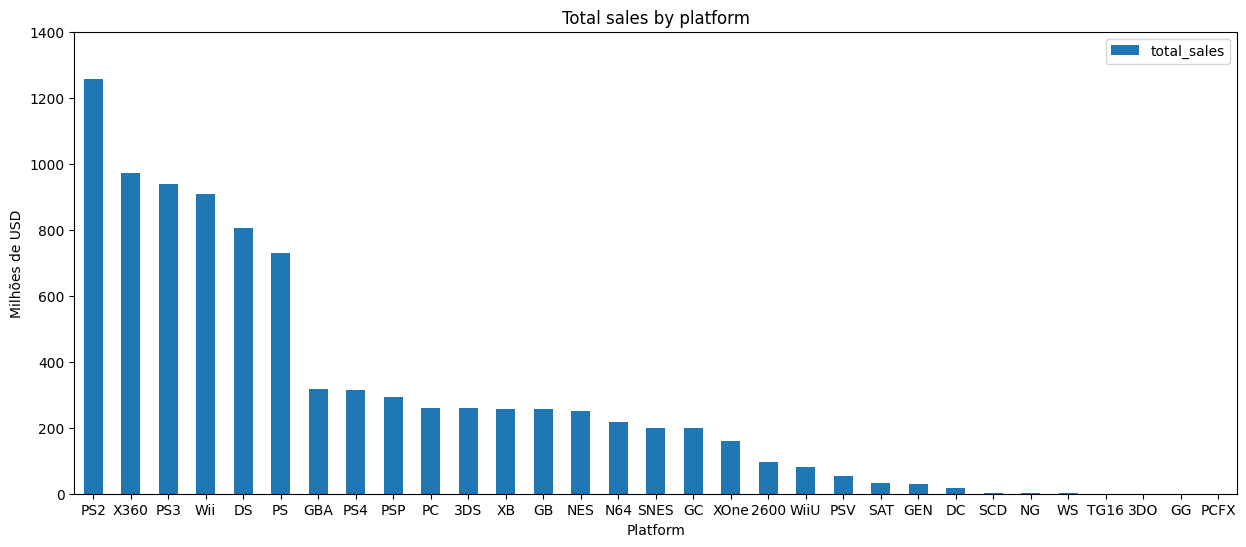

In [21]:
# Creating a pivot table with total sales from platforms
df_games_total_sales = df_games.pivot_table(
    index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)

# Creating bar chart
df_games_total_sales.plot(kind='bar', figsize=(15, 6))
plt.title('Total sales by platform')
plt.ylabel('Milhões de USD')
plt.xlabel('Platform')
plt.xticks(rotation=0)
plt.ylim(0, 1400)
plt.show()

### Platforms with the highest total sales

To continue the studies, the following 5 platforms with the highest total sales were selected:
- PS2
- X360
- PS3
- Wii
- DS

In [22]:
# Creating a DataFrame with only the 5 platforms with the highest total sales
df_games_new = df_games.query('platform in ("PS2", "X360", "PS3", "Wii", "DS")')

display(df_games_new)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16698,Mezase!! Tsuri Master DS,DS,2009,Sports,0.00,0.00,0.01,0.00,75,7.4,unknown,0.01
16702,Plushees,DS,2008,Simulation,0.01,0.00,0.00,0.00,70,7.5,E,0.01
16707,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,69,7.4,unknown,0.00
16708,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,68,7.4,unknown,0.01


platform,DS,PS2,PS3,Wii,X360
year_of_release,,,,,
1985,0.02,NaN,NaN,NaN,NaN
2000,NaN,39.17,NaN,NaN,NaN
2001,NaN,166.43,NaN,NaN,NaN
2002,NaN,208.76,NaN,NaN,NaN
2003,NaN,193.05,NaN,NaN,NaN
2004,17.27,217.93,NaN,NaN,NaN
2005,130.14,163.95,0.19,NaN,9.22
2006,119.81,103.99,21.44,140.19,51.80
2007,147.24,76.10,73.19,153.41,95.41


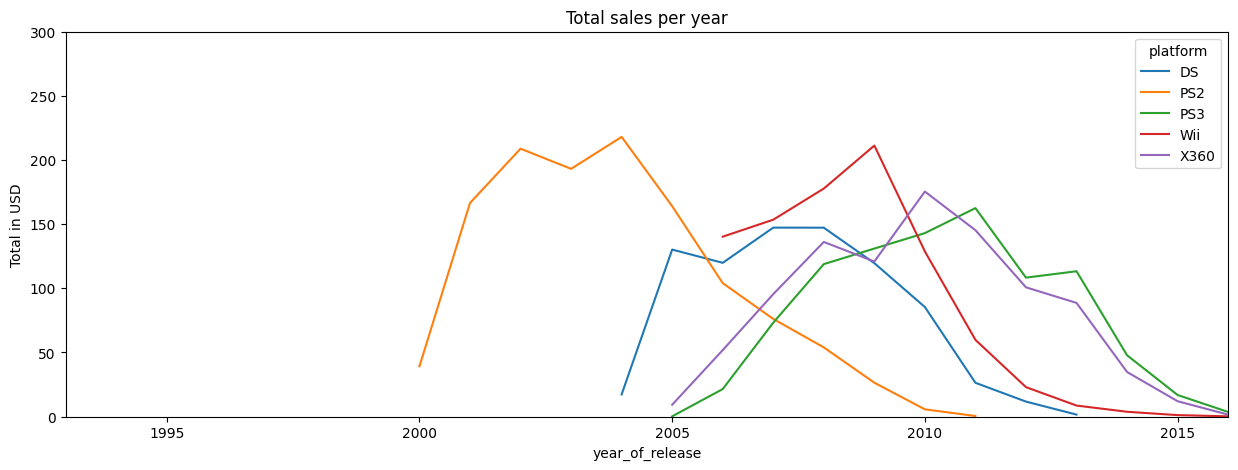

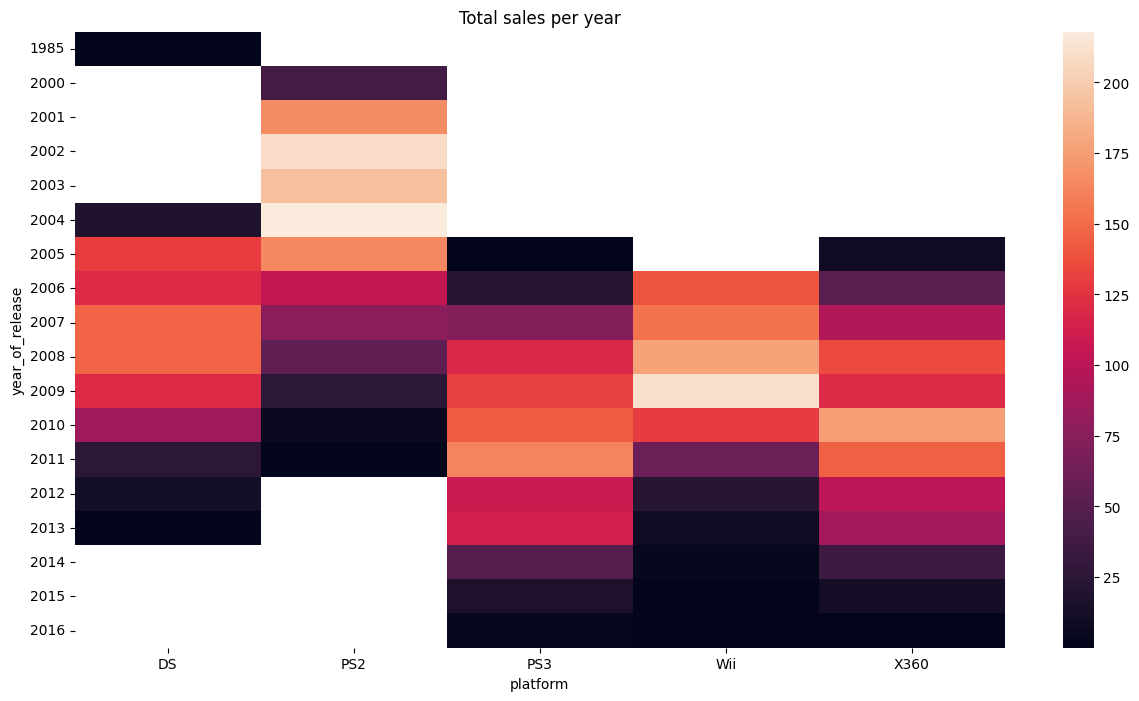

In [23]:
# Creating pivot table of total sales by platform by year
df_games_plat_sales = df_games_new.pivot_table(
    index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')

# Printing pivot table
display(df_games_plat_sales)

# Creating line chart
df_games_plat_sales.plot(figsize=(15, 5))
plt.title('Total sales per year')
plt.ylabel('Total in USD')
plt.ylim(0, 300)
plt.xlim(1993, 2016)
plt.show()

# Creating heatmap graph
plt.figure(figsize=(15,8))
sns.heatmap(df_games_plat_sales)
plt.title('Total sales per year')
plt.show()

It is observed that platforms tend to be popular only during a period. There is an increase in the total amount of sales for a period and then a decrease until there are no more games sold on the market.

The PS2 and DS platforms no longer have any game sales on the market. The X360, Wii and PS3 have already reached their peak sales and are already in decline in the market. If nothing is done, they may not have any significant sales in 2017 or even none at all.

- PS2: from 2000 to 2011 => 11 years
- DS: from 2004 to 2013 => 9 years
- X360: from 2005 to the present
- Wii: from 2006 to the present
- PS3: from 2006 to the present

If nothing is done to ensure that the trend continues, 2017 could be the last year for these last 3 platforms, and we will therefore have an average lifespan of 10.2 years on the market when we consider these 5 with the highest sales.

To continue the analysis to support the strategies for the following year (2017), we will select the period from 2005 to 2016, as these are the years in which the last 3 platforms that still had sales in the last 3 years emerged.

In [24]:
# Creating df from 2005
df_games_new2 = df_games_new.query('year_of_release > 2004')

display(df_games_new2.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91


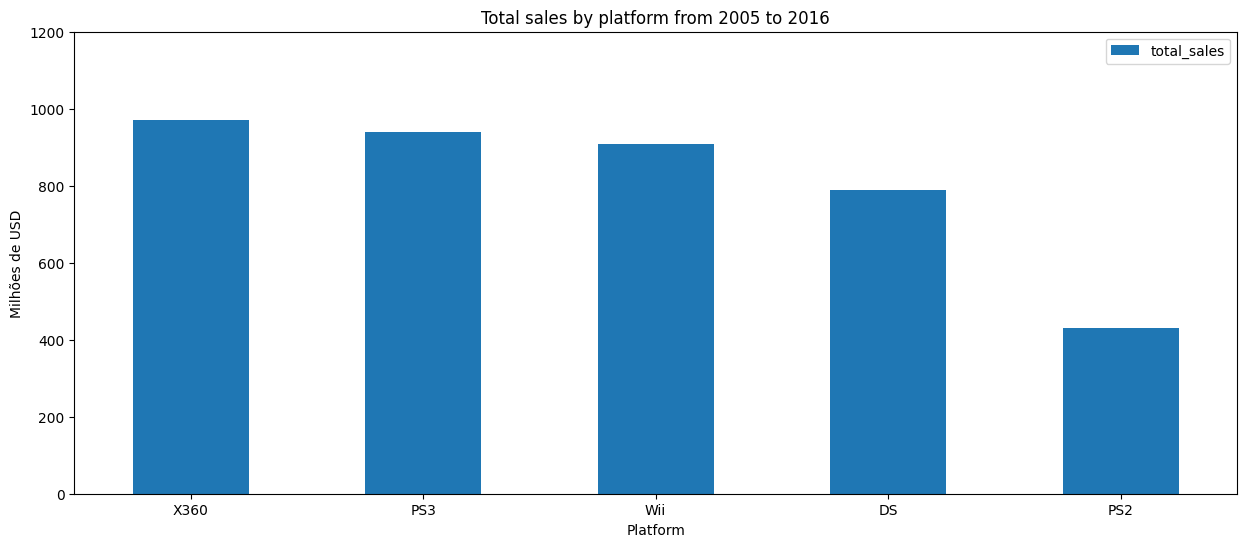

In [25]:
# Creating a pivot table with total sales from platforms
df_games_sales = df_games_new2.pivot_table(
    index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)

# Creating bar chart
df_games_sales.plot(kind='bar', figsize=(15, 6))
plt.title('Total sales by platform from 2005 to 2016')
plt.ylabel('Milhões de USD')
plt.xlabel('Platform')
plt.xticks(rotation=0)
plt.ylim(0, 1200)
plt.show()

During this period, the platforms **X306**, **PS3** and **Wii** were the most profitable, having the highest sales volumes in millions of USD.

platform,DS,PS2,PS3,Wii,X360
year_of_release,,,,,
2005,130.14,163.95,0.19,NaN,9.22
2006,119.81,103.99,21.44,140.19,51.80
2007,147.24,76.10,73.19,153.41,95.41
2008,147.19,53.90,118.79,177.68,136.07
2009,119.56,26.40,130.93,211.17,120.82
2010,85.35,5.64,142.96,128.67,175.35
2011,26.33,0.45,162.44,59.79,145.23
2012,11.67,NaN,108.28,22.94,100.72
2013,1.54,NaN,113.25,8.59,88.58


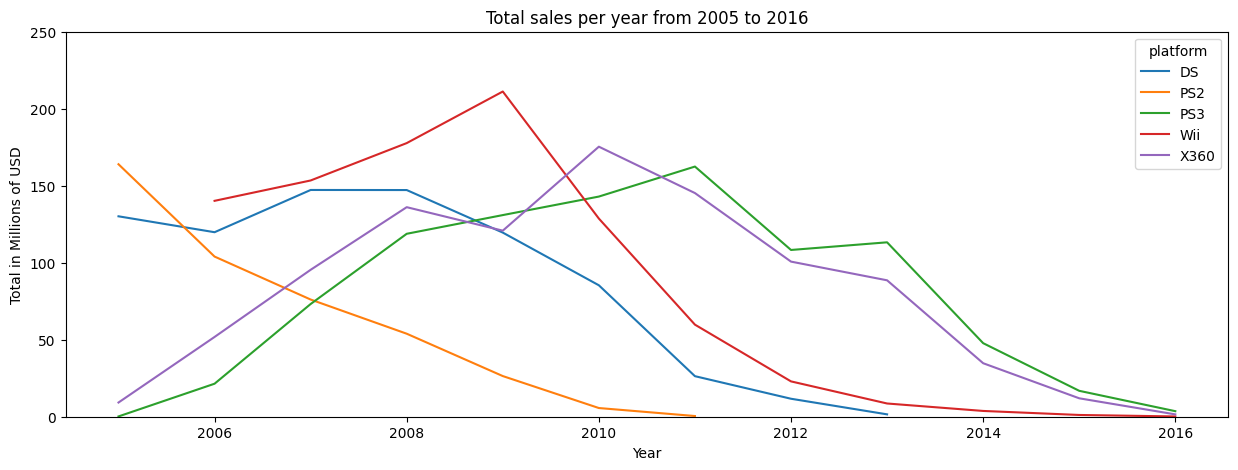

In [26]:
# Creating pivot table of total sales by platform by year
df_games_plat_sales_new = df_games_new2.pivot_table(
    index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')

# Printing pivot table
display(df_games_plat_sales_new)

# Creating line chart
df_games_plat_sales_new.plot(figsize=(15, 5))
plt.title('Total sales per year from 2005 to 2016')
plt.ylabel('Total in Millions of USD')
plt.xlabel('Year')
plt.ylim(0, 250)
plt.show()

In the last 5 years, the platforms **X360**, **PS3** and **Wii** have been declining in their sales with each passing year. And the **PS2** and **DS** don't even have any more.

There is currently no platform that is growing.

Since the platforms **X306**, **PS3** and **Wii** have been the most profitable in recent years, these may be the ones with the greatest profit potential.

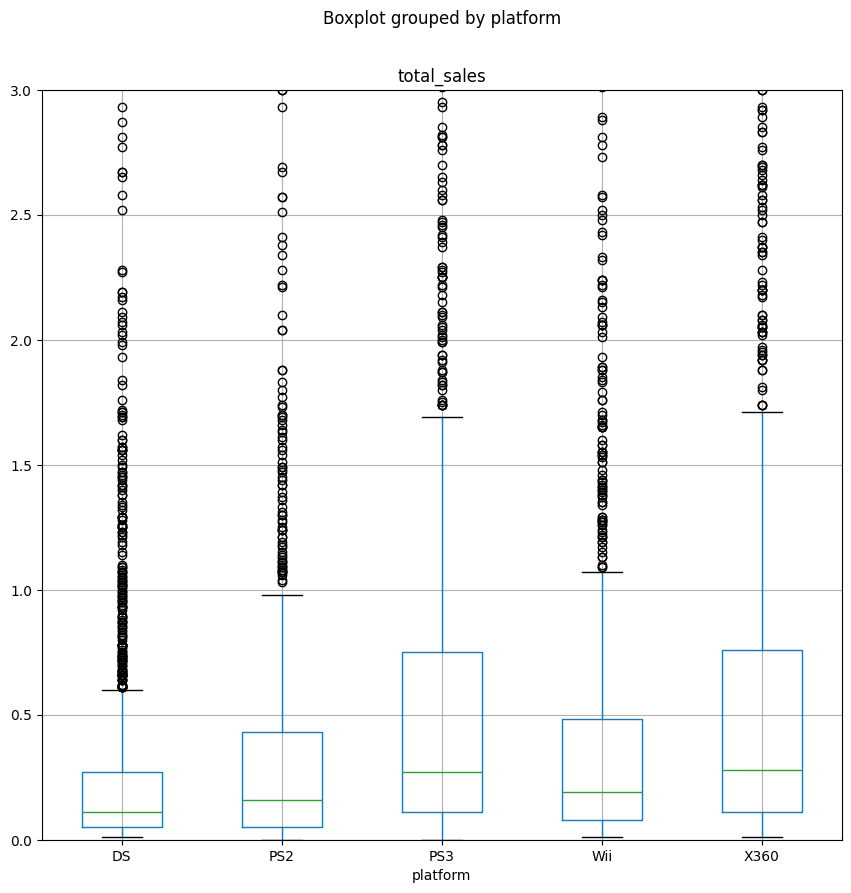

In [27]:
# Building a box plot of global sales
df_games_new2.boxplot(column='total_sales', by='platform', figsize=(10,10))
plt.ylim(0, 3)
plt.show()

Sales on **X360** and **PS3** do not differ significantly, but there is a difference for **Wii**, where sales are lower than the other 2 platforms.

,total_sales
platform,
DS,0.370865
PS2,0.401521
PS3,0.705973
Wii,0.687508
X360,0.769746


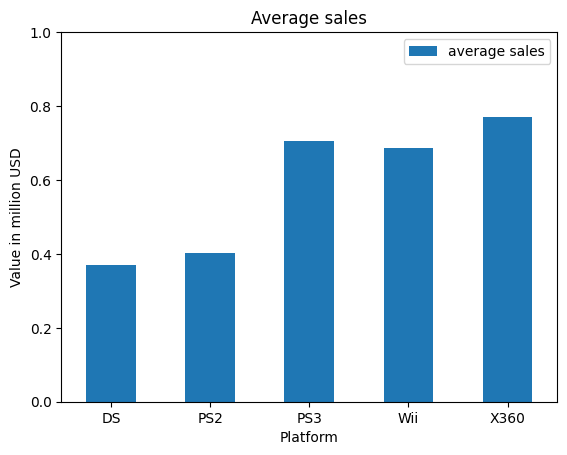

In [28]:
# Average sales by platform
display(df_games_new2.pivot_table(index='platform', values='total_sales', aggfunc='mean'))

# Creating bar chart
df_games_new2.pivot_table(index='platform', values='total_sales', aggfunc='mean').plot(kind='bar')
plt.title('Average sales')
plt.legend(['average sales', 'total_sales'])
plt.ylabel('Value in million USD')
plt.xlabel('Platform')
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.show()

The platforms **X360**, **PS3** and **Wii** also have the highest average sales values, however the **Wii** has a very similar average compared to the **PS3** even though the total number of sales is significantly lower.

### Reviews x Sales

It will be verified whether the reviews of Users (`user_score` column) and Experts (`critic_score` column) influence the sales of these platforms.

#### Total Sales x User Ratings

In [29]:
# Building a scatter plot between total sales and user ratings
df_aux1 = df_games_new2.loc[:, ['name', 'platform', 'genre', 'user_score', 'critic_score', 'total_sales']]

# Printing statistical information
print(df_aux1.describe())

        user_score  critic_score  total_sales
count  7112.000000   7112.000000  7112.000000
mean      7.160096     68.542323     0.567750
std       1.098437     10.479928     1.828743
min       0.000000     13.000000     0.000000
25%       7.100000     66.000000     0.070000
50%       7.400000     69.000000     0.180000
75%       7.600000     74.000000     0.490000
max       9.500000     98.000000    82.540000


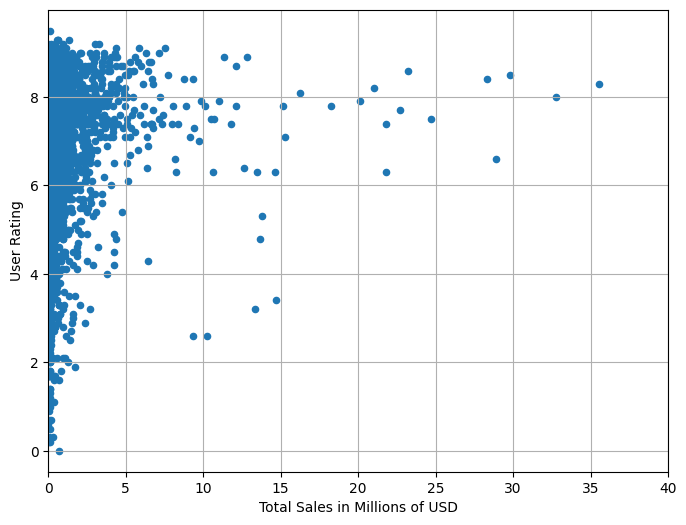

Correlação entre avaliação dos usuários e vendas totais: 0.04084829500993969


In [30]:
# Sorting by the 'user_score' column
df_aux1 = df_aux1.sort_values(by='user_score')

# Creating scatter plot
df_aux1.plot(
    x='total_sales', y='user_score', kind='scatter', figsize=(8,6), grid=True)
plt.xlim(0, 40)
plt.xlabel('Total Sales in Millions of USD')
plt.ylabel('User Rating')
plt.show()

print('Correlation between user ratings and total sales:', df_aux1['user_score'].corr(df_aux1['total_sales']))

Although the scatter plot shows us an increase in total sales as user ratings increase, the correlation between these is very low. Meaning that these ratings have very little influence on total sales.

#### Total Sales x Expert Ratings

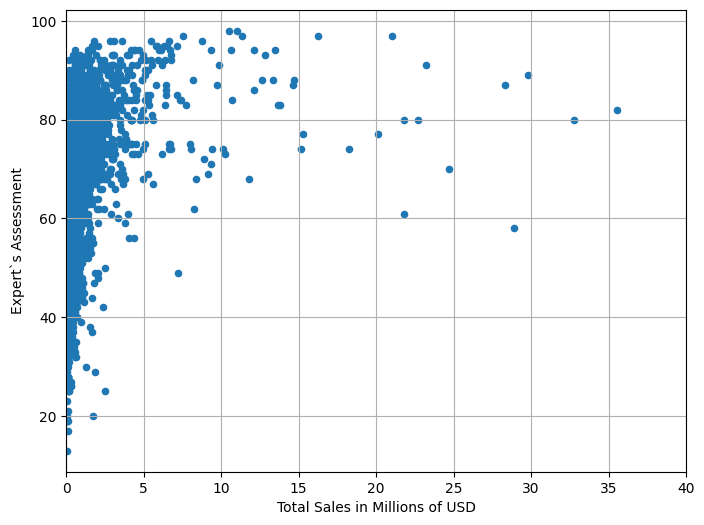

Correlação entre avaliação dos especialistas e vendas totais: 0.21356204601317738


In [31]:
# Sorting by the 'critic_score' column
df_aux1 = df_aux1.sort_values(by='critic_score')

# Creating scatter plot
df_aux1.plot(
    x='total_sales', y='critic_score', kind='scatter', figsize=(8,6), grid=True)
plt.xlim(0, 40)
plt.xlabel('Total Sales in Millions of USD')
plt.ylabel('Expert`s Assessment')
plt.show()

print('Correlation between expert assessment and total sales:', df_aux1['critic_score'].corr(df_aux1['total_sales']))

This scatter plot also shows us an increase in total sales as the experts' ratings increase, but the correlation between these, although generally low, is higher than the correlation with the users' ratings. This means that these ratings have a greater influence on total sales than the users' ratings.

These correlations will be checked

In [32]:
# Checking the number of games
print(df_aux1['name'].nunique())

5144


As the volume of games is extremely high, game sales by platform will not be compared.

#### Total Sales by Genre

At this point, the total sales by game genre will be checked.

In [33]:
# Checking the number of genera
print('Total game genres are:', df_aux1['genre'].nunique())

Total de gêneros dos jogos é de: 12


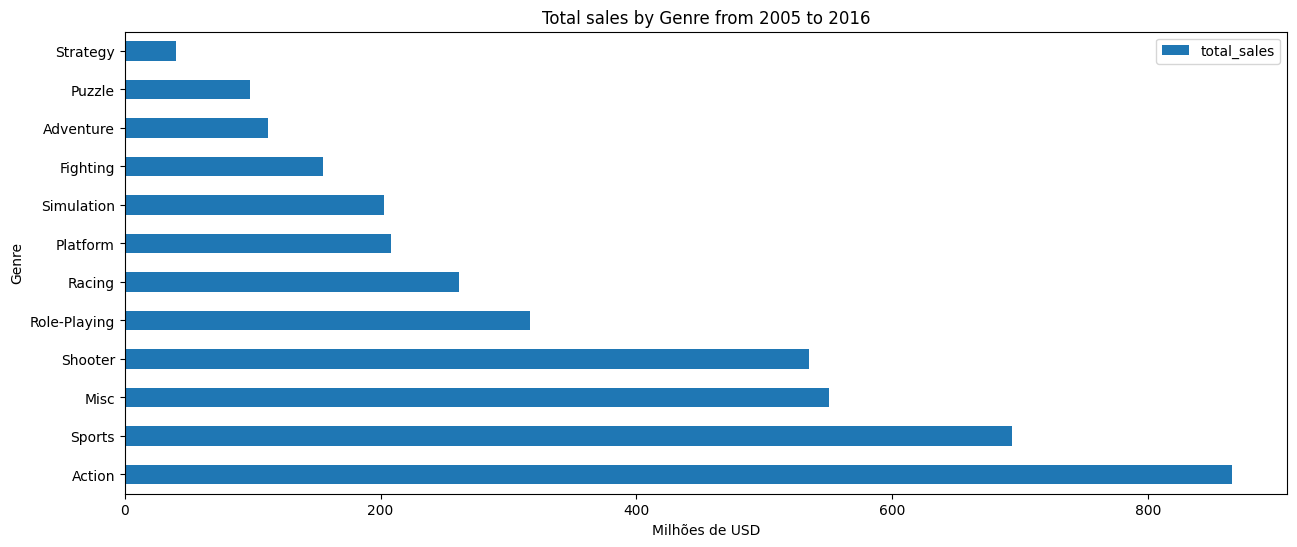

In [34]:
# Creating a pivot table with total sales of genres
df_genre_sales = df_games_new2.pivot_table(
    index='genre', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)

# Creating bar chart
df_genre_sales.plot(kind='barh', figsize=(15, 6))
plt.title('Total sales by Genre from 2005 to 2016')
plt.ylabel('Genre')
plt.xlabel('Milhões de USD')
plt.show()

Of the 12 game genres observed, `Action` is the one that generates the most financial return for the platforms. Followed by `Sport`, `Misc` and `Shooter`. The 4 genres with the lowest sales are `Fighting`, `Adventure`, `Puzzle` and lastly `Strategy`.

### User Profile by Region (NA, EU, JP)

Data will be analyzed to perform the following checks by region:
- Top platforms and their market shares from region to region
- Top 5 genres
- And whether ESRB ratings affect sales by region

#### North America (NA) Region User Profile

##### North American platform share

          na_sales
platform          
DS          374.07
PS2         202.45
PS3         393.49
Wii         496.90
X360        602.47


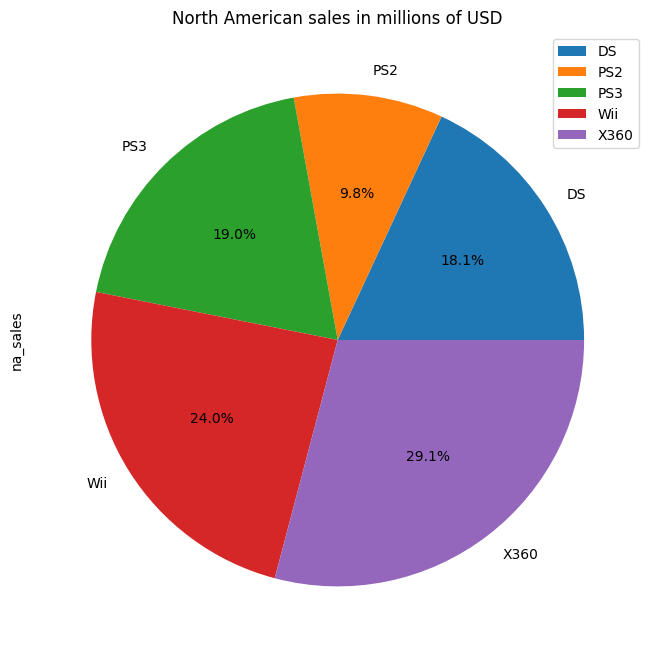

In [35]:
# Dynamic Sales Table for the Region
df_reg_na = df_games_new2.pivot_table(index='platform', values='na_sales', aggfunc='sum')
print(df_reg_na)

df_reg_na.plot(y='na_sales', kind='pie', figsize=(8,8), autopct='%1.1f%%')
plt.title('North American sales in millions of USD')
plt.show()

In the North American region, the distribution of market shares between platforms is as follows:
- 29.0% for the X360
- 23.9% for the Wii
- 18.9% for the PS3
- 18.0% for the DS
- 10.2% for the PS2

##### Top Game Genres in North America

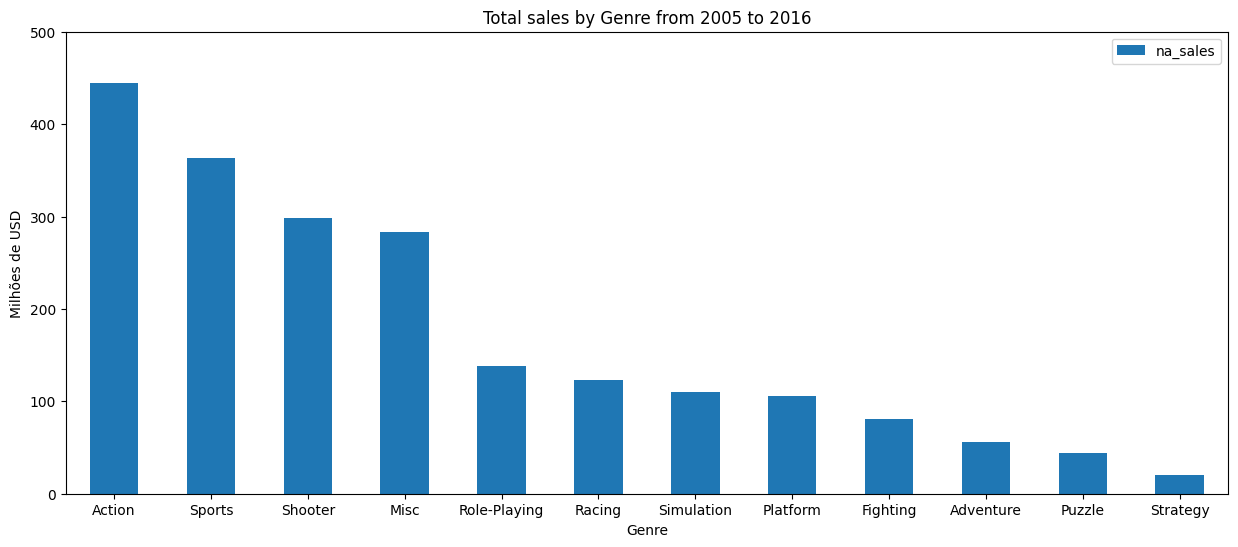

In [36]:
# Creating a pivot table with total sales of genres
df_genre_na = df_games_new2.pivot_table(
    index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)

# Creating bar chart
df_genre_na.plot(kind='bar', figsize=(15, 6))
plt.title('Total sales by Genre from 2005 to 2016')
plt.ylabel('Milhões de USD')
plt.xlabel('Genre')
plt.xticks(rotation=0)
plt.ylim(0, 500)
plt.show()

The top 5 genres with the highest returns for platforms in North America are:
- Action
- Sports
- Shooter
- Misc
- Role-Playing

##### ESRB Rating List for North America

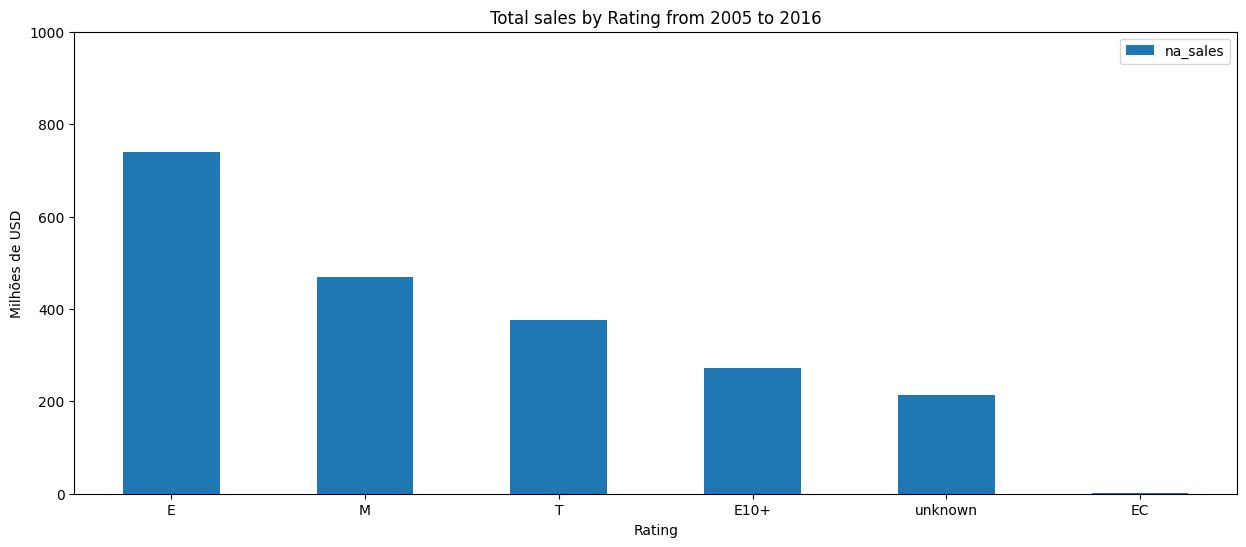

In [37]:
# Creating a pivot table with total sales by classification
df_rating_na = df_games_new2.pivot_table(
    index='rating', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)

# Creating bar chart
df_rating_na.plot(kind='bar', figsize=(15, 6))
plt.title('Total sales by Rating from 2005 to 2016')
plt.ylabel('Milhões de USD')
plt.xlabel('Rating')
plt.xticks(rotation=0)
plt.ylim(0, 1000)
plt.show()

The top 3 ESRB ratings with the highest returns for platforms in North America are:
- E
- M
- T

#### European Union (EU) Region User Profile

##### Platform quota in the European Union

          eu_sales
platform          
DS          184.96
PS2          88.46
PS3         330.29
Wii         262.21
X360        270.76


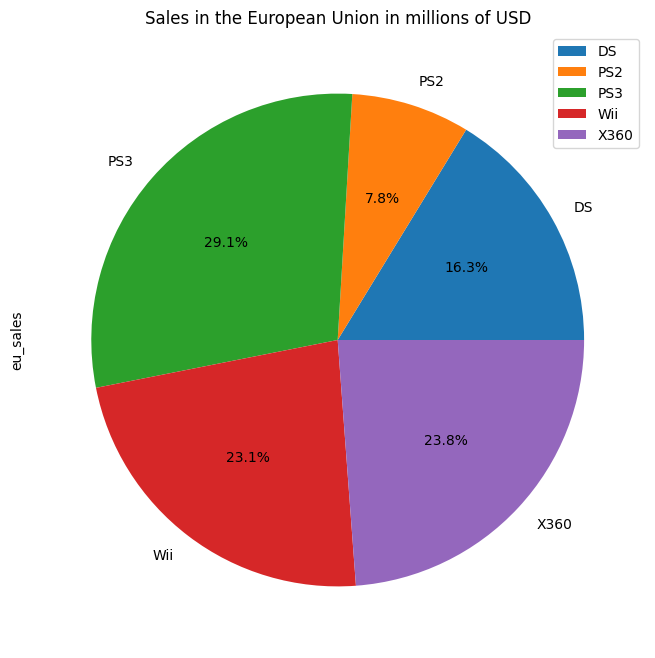

In [38]:
# Dynamic Sales Table for the Region
df_reg_eu = df_games_new2.pivot_table(index='platform', values='eu_sales', aggfunc='sum')
print(df_reg_eu)

df_reg_eu.plot(y='eu_sales', kind='pie', figsize=(8,8), autopct='%1.1f%%')
plt.title('Sales in the European Union in millions of USD')
plt.show()

In the European Union region, the distribution of market shares between platforms is as follows:
- 28.9% for PS3
- 23.7% for X360
- 23.0% for Wii
- 16.2% for DS
- 8.2% for PS2

##### Main game genres in the European Union

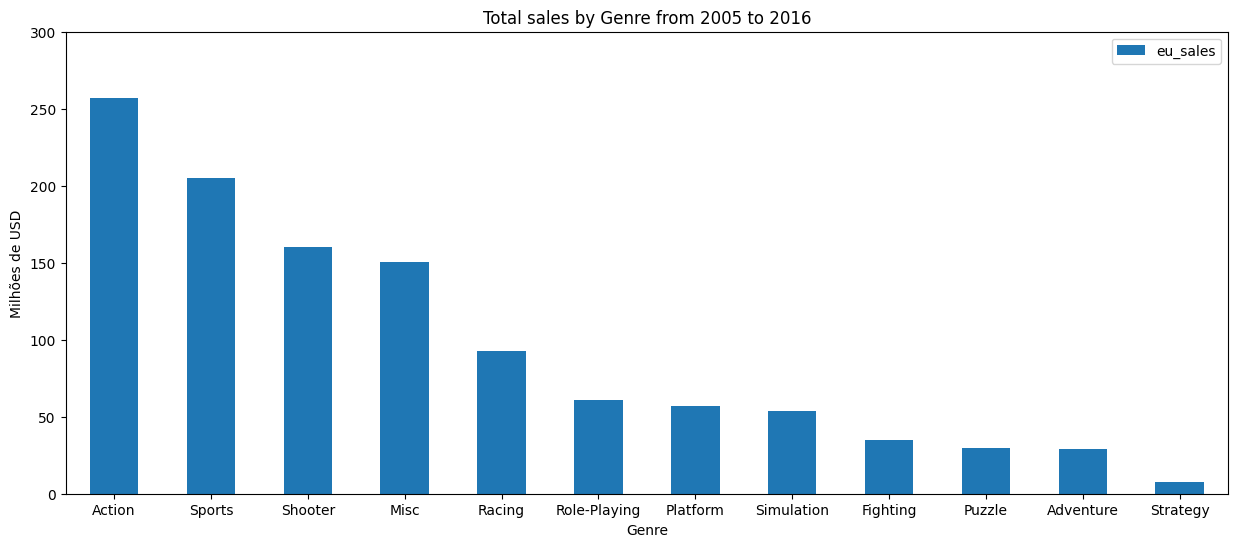

In [39]:
# Creating a pivot table with total sales of genres
df_genre_eu = df_games_new2.pivot_table(
    index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)

# Creating bar chart
df_genre_eu.plot(kind='bar', figsize=(15, 6))
plt.title('Total sales by Genre from 2005 to 2016')
plt.ylabel('Milhões de USD')
plt.xlabel('Genre')
plt.xticks(rotation=0)
plt.ylim(0, 300)
plt.show()

The top 5 genres with the highest returns for platforms in the European Union are:
- Action
- Sports
- Shooter
- Misc
- Racing

##### ESRB ratings in the European Union

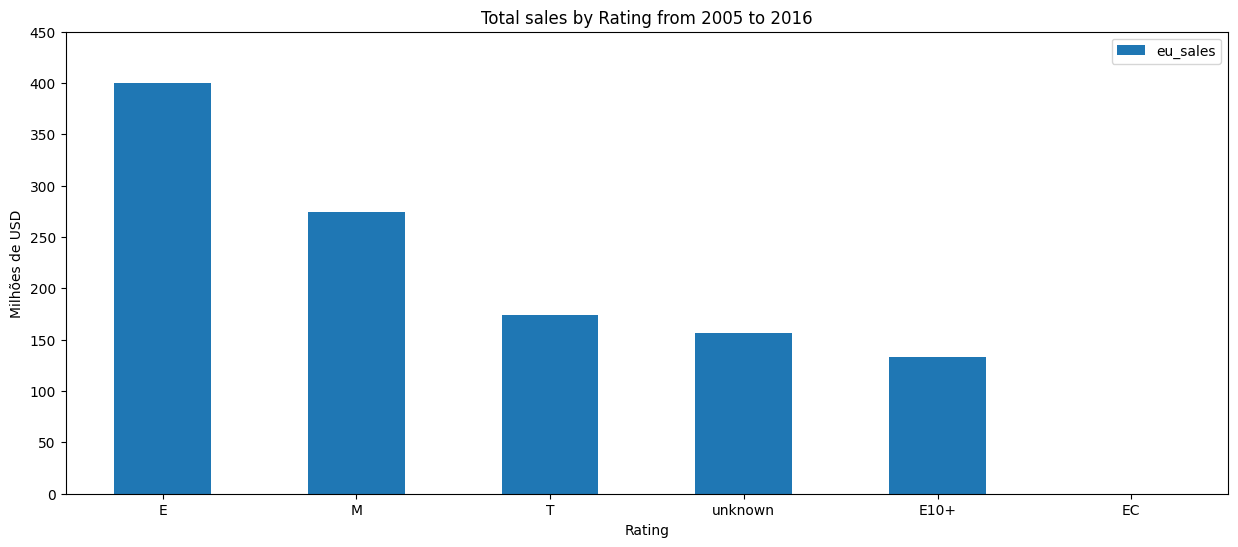

In [40]:
# Creating a pivot table with total sales by classification
df_rating_eu = df_games_new2.pivot_table(
    index='rating', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)

# Creating bar chart
df_rating_eu.plot(kind='bar', figsize=(15, 6))
plt.title('Total sales by Rating from 2005 to 2016')
plt.ylabel('Milhões de USD')
plt.xlabel('Rating')
plt.xticks(rotation=0)
plt.ylim(0, 450)
plt.show()

The top 3 ESRB ratings with the highest returns for platforms in the European Union are:
- E
- M
- T

#### Japan (JP) Region User Profile

##### Platform share in Japan

          jp_sales
platform          
DS          171.90
PS2          51.17
PS3          80.19
Wii          69.33
X360         12.43


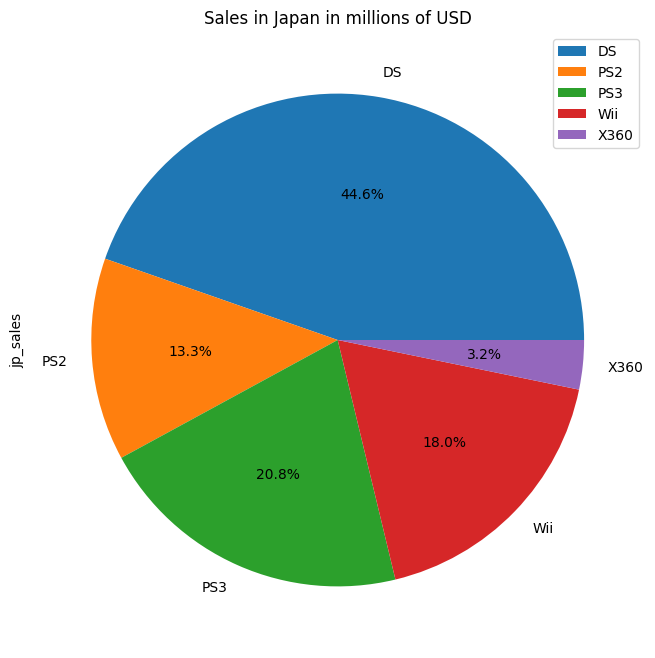

In [41]:
# Dynamic Sales Table for the Region
df_reg_jp = df_games_new2.pivot_table(index='platform', values='jp_sales', aggfunc='sum')
print(df_reg_jp)

df_reg_jp.plot(y='jp_sales', kind='pie', figsize=(8,8), autopct='%1.1f%%')
plt.title('Sales in Japan in millions of USD')
plt.show()

In the Japan region, the distribution of market shares between platforms is as follows:
- 44.5% for DS
- 20.7% for PS3
- 17.9% for Wii
- 13.6% for PS2
- 3.2% for X360

##### Main game genres in Japan

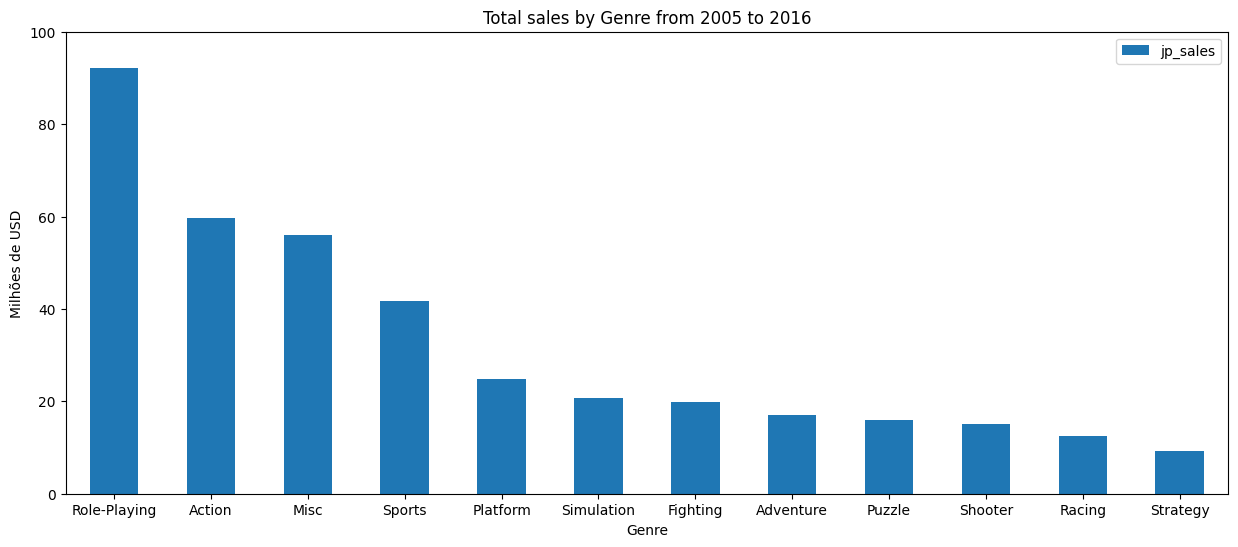

In [42]:
# Creating a dynamic table with total sales of genres
df_genre_jp = df_games_new2.pivot_table(
    index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)

# Creating bar chart
df_genre_jp.plot(kind='bar', figsize=(15, 6))
plt.title('Total sales by Genre from 2005 to 2016')
plt.ylabel('Milhões de USD')
plt.xlabel('Genre')
plt.xticks(rotation=0)
plt.ylim(0, 100)
plt.show()

The top 5 genres with the highest returns for platforms in Japan are:
- Role-Playing
- Action
- Misc
- Sports
- Shooter

##### List of ESRB ratings in Japan

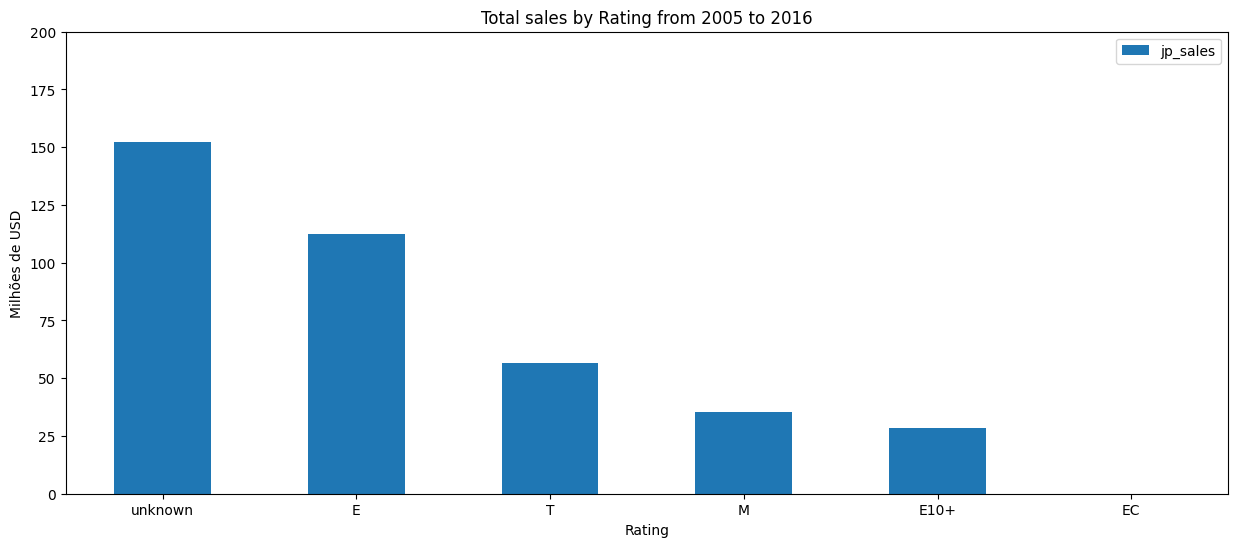

In [43]:
# Creating a pivot table with total sales by classification
df_rating_jp = df_games_new2.pivot_table(
    index='rating', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)

# Creating bar chart
df_rating_jp.plot(kind='bar', figsize=(15, 6))
plt.title('Total sales by Rating from 2005 to 2016')
plt.ylabel('Milhões de USD')
plt.xlabel('Rating')
plt.xticks(rotation=0)
plt.ylim(0, 200)
plt.show()

The top 3 ESRB ratings with the highest returns for platforms in the European Union are:
- Unknown
- E
- T

#### Sub Conclusion

The user profile changes from region to region. Regarding the types of platforms, main genres and ESBR classification.

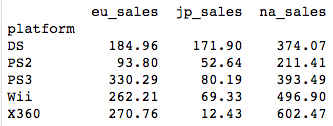

In the North American region, the most popular platform is the **X360**, accounting for 29.0% of this market.

The **PS3** is the most popular in the European Union, with 28.9% of the market.

And with 44.5%, the **DS** is most popular in Japan.

The top 5 genres in North America and the European Union are almost the same, with the exception of the fifth, which are **Role-Playing** and **Racing** respectively.

In Japan, however, this profile changes a little, with **Role-Playing** being the most popular genre in the region, followed by Action, Misc, Sports and Shooter.

The ESBR classifications are very similar with the top 3 being the same in the North American and European Union regions. In the Japan region there was a lack of many classifications and therefore 'Unknown' was the most frequent.

### Statistical Hypothesis Tests

To conclude the studies, two hypotheses will be tested:
- The average ratings of users of the XOne (Xbox One) and PC platforms are the same.
- The average ratings of users for the Action and Sports genres are different.

The alternative and null hypotheses will be formulated based on what we want to verify.
The null hypothesis will be that the averages are the same and the alternative hypothesis will be that they are different.

For each test, we will have a null and an alternative hypothesis and the critical level of significance will be 5%.

The level of significance is the limit that determines whether the result of the study will be considered statistically significant after the tests. Working with 5%, this indicates a 5% risk of concluding that there is a difference between the results of the study and the null hypothesis, when in fact there is no difference.

#### Hypotheses between XOne and PC platforms

Null Hypothesis (H<sub>0</sub>): The average ratings of users of the XOne (Xbox One) and PC platforms are the same.

Alternative Hypothesis (H<sub>1</sub>): The average ratings of users of the XOne (Xbox One) and PC platforms are different.

In [44]:
# Creating a df with user ratings for each platform
df_user_score_plat = df_games[['platform', 'user_score']]

# Creating a pd.Series with only XOne ratings
df_user_score_xone = df_user_score_plat.loc[df_user_score_plat['platform'] == 'XOne']
df_user_score_xone = df_user_score_xone.drop('platform', axis=1)
df_user_score_xone = df_user_score_xone.reset_index(drop=True)
df_user_score_xone.columns = ['xone_user_score']

# Creating a pd.Series with only PC ratings
df_user_score_pc = df_user_score_plat.loc[df_user_score_plat['platform'] == 'PC']
df_user_score_pc = df_user_score_pc.drop('platform', axis=1)
df_user_score_pc = df_user_score_pc.reset_index(drop=True)
df_user_score_pc.columns = ['pc_user_score']

# Checking variances
print('Variance:', np.var(df_user_score_xone))
print('Variance:', np.var(df_user_score_pc))
print()

# Testing hypotheses considering equal variances
alpha = 0.05

results1 = st.ttest_ind(df_user_score_xone, df_user_score_pc)
print('p_value:', results1.pvalue)

if results1.pvalue < alpha:
    print('Reject the null hypothesis.')
else:
    print('Do not reject the null hypothesis.')

Variância: xone_user_score    1.566415
dtype: float64
Variância: pc_user_score    1.894026
dtype: float64

p_value: [3.53413667e-05]
Rejeitar a hipótese nula.


/Users/thiagodelreyramosdemelo/.pyenv/versions/3.10.13/lib/python3.10/site-packages/numpy/_core/fromnumeric.py:4316: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


The null hypothesis was rejected by the equality of means test. This means that the average ratings of users of the XOne (Xbox One) and PC platforms are different.

#### Hypotheses between Action and Sports genres

Null Hypothesis (H<sub>0</sub>): The average user ratings for the Action and Sports genres are the same.

Alternative Hypothesis (H<sub>1</sub>): The average user ratings for the Action and Sports genres are different.

In [45]:
# Creating a df with user ratings for each genre
df_user_score_genre = df_games[['genre', 'user_score']]

# Creating a pd.Series with only the Action genre
df_user_score_action = df_user_score_genre.loc[df_user_score_genre['genre'] == 'Action']
df_user_score_action = df_user_score_action.drop('genre', axis=1)
df_user_score_action = df_user_score_action.reset_index(drop=True)
df_user_score_action.columns = ['action_user_score']

# Creating a pd.Series with only the Sports genre
df_user_score_sports = df_user_score_genre.loc[df_user_score_genre['genre'] == 'Sports']
df_user_score_sports = df_user_score_sports.drop('genre', axis=1)
df_user_score_sports = df_user_score_sports.reset_index(drop=True)
df_user_score_sports.columns = ['sports_user_score']

# Checking variances
print('Variance:', np.var(df_user_score_action))
print('Variance:', np.var(df_user_score_sports))
print()

# Testing hypotheses considering equal variances
alpha = 0.05

results2 = st.ttest_ind(df_user_score_action, df_user_score_sports)
print('p_value:', results2.pvalue)

if results2.pvalue < alpha:
    print('Reject the null hypothesis.')
else:
    print('Do not reject the null hypothesis.')

Variância: action_user_score    1.132715
dtype: float64
Variância: sports_user_score    1.266598
dtype: float64

p_value: [0.53425705]
Não rejeitar a hipótese nula.


/Users/thiagodelreyramosdemelo/.pyenv/versions/3.10.13/lib/python3.10/site-packages/numpy/_core/fromnumeric.py:4316: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


The null hypothesis was not rejected by the equality of means test. This means that the average user ratings for the Action and Sports genres are equal.

## General Conclusion

- 6 columns with missing values ​​were observed.
- There were only 2 rows with missing values ​​in the `name` and `genre` columns, and these were deleted.
- In the `year_of_release` column, the median values ​​for each platform were filled in.
- The missing data in the `critic_score` and `user_score` columns were filled in with the median ratings for the respective game genres.
- And the missing values ​​in the `rating` column were filled in with unknown.
- The data in the `year_of_release` and `critic_score` columns were converted from their float type to integer. And the data in the `user_score` column were converted from 'object' to 'float' during the processing of the missing values ​​and the 'tbd' information.
- The `total_sales` column was created with the total sales of the platforms. - There was a considerable increase in the total number of games released per year around 1993, but this began to fall from 2009 onwards. In 2016 there were 502 games, which is around 1/3 of the peak already reached.
- The 5 platforms with the highest total sales are **PS2**, **X360**, **PS3**, **Wii** and **DS**.
- Correlation between user ratings and total sales: 0.041.
- Correlation between expert ratings and total sales: 0.21.
- The genres with the highest total sales are, in this order, **Action, Sports, Misc, Shooter and Role-Playing**.

**User Profile by Region**

North America

Platforms
- 29.0% for X360
- 23.9% for Wii
- 18.9% for PS3
- 18.0% for DS
- 10.2% for PS2

Genre (Top 5 in descending order)
- Action
- Sports
- Shooter
- Misc
- Role-Playing

ESRB (Top 3 in descending order)
- E
- M
- T

European Union

Platform
- 28.9% for PS3
- 23.7% for X360
- 23.0% for Wii
- 16.2% for DS
- 8.2% for PS2

Genre (Top 5 in descending order)
- Action
- Sports
- Shooter
- Misc
- Racing

ESRB (Top 3 in descending order)
- E
- M
- T

Japan

Platform
- 44.5% for DS
- 20.7% for PS3
- 17.9% for Wii
- 13.6% for PS2
- 3.2% for X360

Genre (Top 5 in descending order)
- Role-Playing
- Action
- Misc
- Sports
- Shooter

ESRB (Top 3 in descending order)
- Unknown
- E
- T

The average user ratings for the XOne and PC platforms are different.

The average user ratings for the Action and Sports genres are the same.